<a href="https://colab.research.google.com/github/AarthiKalyanasundaram/Detailed_EDA/blob/master/Detailed_EDA_using_Transaction_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Libraries**

In [65]:
#Importing required Libraries
import pandas as pd
import torch
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os

**Reading the Files**

In [ ]:
#reading data using pandas 
from google.colab import files
uploaded = files.upload()
import io
data = pd.read_csv(io.BytesIO(uploaded['DataDarkV2.csv']))

Saving DataDarkV2.csv to DataDarkV2 (2).csv


***Finding the shape of the data***

In [ ]:
data.shape

(991286, 19)

***Get to know the data***

In [ ]:
data.head()

,customer_id,merchant_name_new,behav_category,ratings,norm_ratings,userId,merchantId,merchant_country,merchant_city,top90_flag,tran_amount,Card_type,card_id,mar_status,age,gender,customer_country,cr_lim_group,customer_city
0,0064384c-53f4-439f-afa8-527fb6069433,thewaitingroomcafe,dining,1,1.0,105,10003,india,mumbai,yes,4.17,SILVER,44f76029-2a05-4b30-8ef6-081460c00957,M,38,M,India,5000,Chennai
1,0064384c-53f4-439f-afa8-527fb6069433,falak,dining,1,1.0,105,3069,india,pune,yes,5.42,SILVER,44f76029-2a05-4b30-8ef6-081460c00957,M,38,M,India,5000,Chennai
2,0064384c-53f4-439f-afa8-527fb6069433,plandinnerrestaurant,dining,1,1.0,105,7015,united arab emirates,dubai,yes,4.17,SILVER,44f76029-2a05-4b30-8ef6-081460c00957,M,38,M,India,5000,Chennai
3,0064384c-53f4-439f-afa8-527fb6069433,wildfirezamericangrill,dining,1,1.0,105,10667,united arab emirates,abu dhabi,no,2.08,SILVER,44f76029-2a05-4b30-8ef6-081460c00957,M,38,M,India,5000,Chennai
4,0064384c-53f4-439f-afa8-527fb6069433,levelone,dining,1,1.0,105,5286,united arab emirates,abu dhabi,no,7.50,SILVER,44f76029-2a05-4b30-8ef6-081460c00957,M,38,M,India,5000,Chennai


***Missing Data Analysis***

In [ ]:
data.isnull().sum()

customer_id          0
merchant_name_new    0
behav_category       0
ratings              0
norm_ratings         0
userId               0
merchantId           0
merchant_country     0
merchant_city        0
top90_flag           0
tran_amount          0
Card_type            0
card_id              0
mar_status           0
age                  0
gender               0
customer_country     0
cr_lim_group         0
customer_city        0
dtype: int64

***Top 5 Merchants by Mean Rating***

In [80]:
df_by_ratings_count = data.groupby('merchant_name_new')['norm_ratings'].agg(['mean'])

In [82]:
print (df_by_ratings_count.sort_values(by='mean',ascending=False).head(5))

                            mean
merchant_name_new               
fairmonthotelsresorts   1.365675
trisaraphuketthailand   1.363636
thomascook              1.331103
swissotelhotelsresorts  1.319193
tridenthotelsindia      1.305769


***Top Merchants by Counts***

In [88]:
df_by_merchant_count = data.groupby('merchant_name_new').agg(['count'])

In [92]:
print (df_by_merchant_count.sort_values(by="merchant_name_new").head(5))

                        customer_id behav_category  ... cr_lim_group customer_city
                              count          count  ...        count         count
merchant_name_new                                   ...                           
0percenteasypaymentplan         629            629  ...          629           629
10downingstreet                  24             24  ...           24            24
11to11tastebusterzz              21             21  ...           21            21
12thmaingrandmercure             18             18  ...           18            18
12unionparkbyshatranj            24             24  ...           24            24

[5 rows x 18 columns]


In [ ]:
data.top90_flag.value_counts()

yes    882638
no     108648
Name: top90_flag, dtype: int64

***Top 5 Merchants by Percent Liking***

In [86]:
df_by_liking_count = data.groupby('merchant_name_new')['top90_flag'].agg(['count'])

In [87]:
print (df_by_liking_count.sort_values(by='count',ascending=False).head(5))

                       count
merchant_name_new           
medplus                 6757
artzolo                 6696
frankautocarspacentre   6650
jewelhub                6644
fasttrackauto           4894


***Finding Correlation***

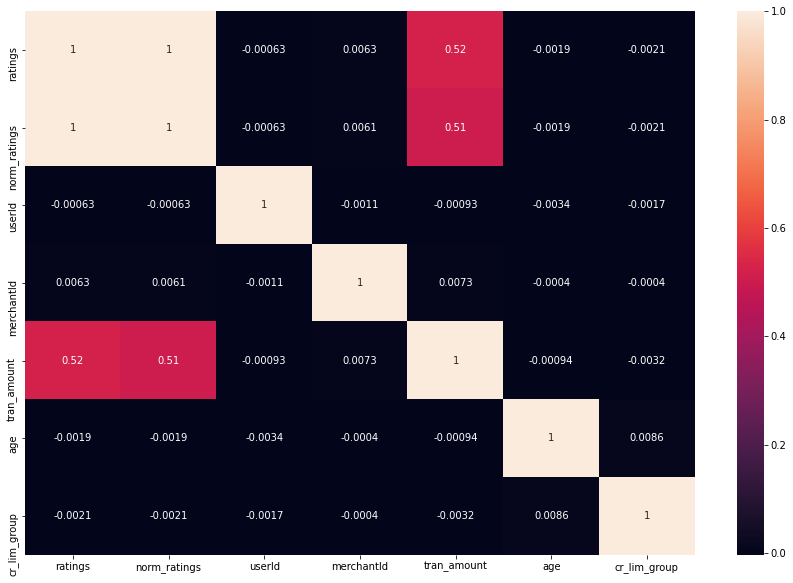

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data_correlation = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(data_correlation,annot=True)
plt.show()

**Data Munging and Exploratory Data Analysis**

***Analysis of data with respect to Gender***

In [95]:
df_by_gender_count = data.groupby('gender')['norm_ratings'].agg(['mean','count'])
print (df_by_gender_count.sort_values(by='count',ascending=False).head(25))

            mean   count
gender                  
M       1.028308  593144
F       1.027548  398142


***Findout the Gender who transacted a lot***

In [96]:
df_gender_analysis = data.groupby("gender")["tran_amount"].agg(['count'])
print(df_gender_analysis.sort_values(by="count",ascending=False))

         count
gender        
M       593144
F       398142


***Ratings Analysis***

count    991286.000000
mean          1.289930
std           0.972851
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          58.000000
Name: ratings, dtype: float64


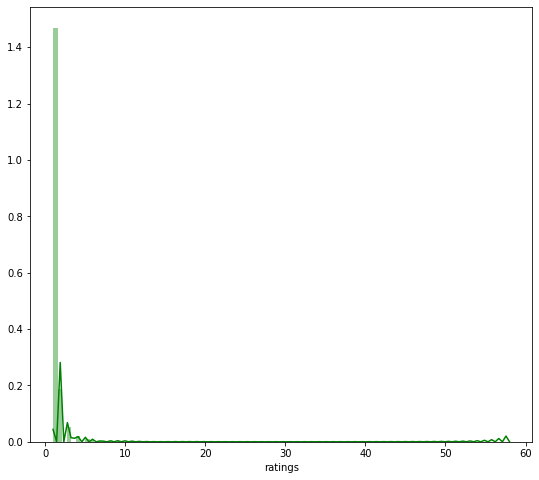

In [ ]:
print(data['ratings'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data['ratings'], color='g', bins=100, hist_kws={'alpha': 0.4});

***Norm Rating Distribution Analysis***

count    991286.000000
mean          1.028003
std           0.089260
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           5.000000
Name: norm_ratings, dtype: float64


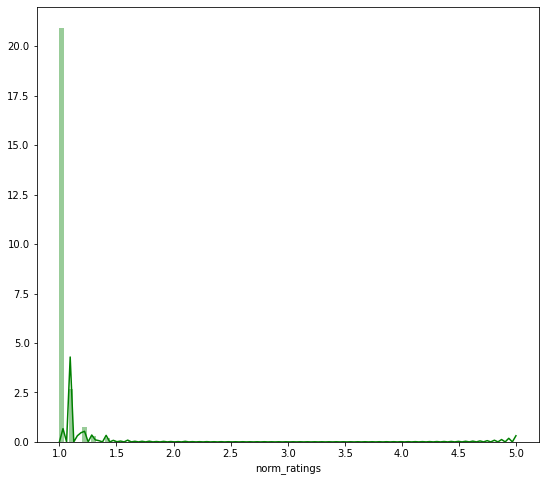

In [97]:
print(data['norm_ratings'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data['norm_ratings'], color='g', bins=100, hist_kws={'alpha': 0.4});

***Distribution of Features using pair plot***

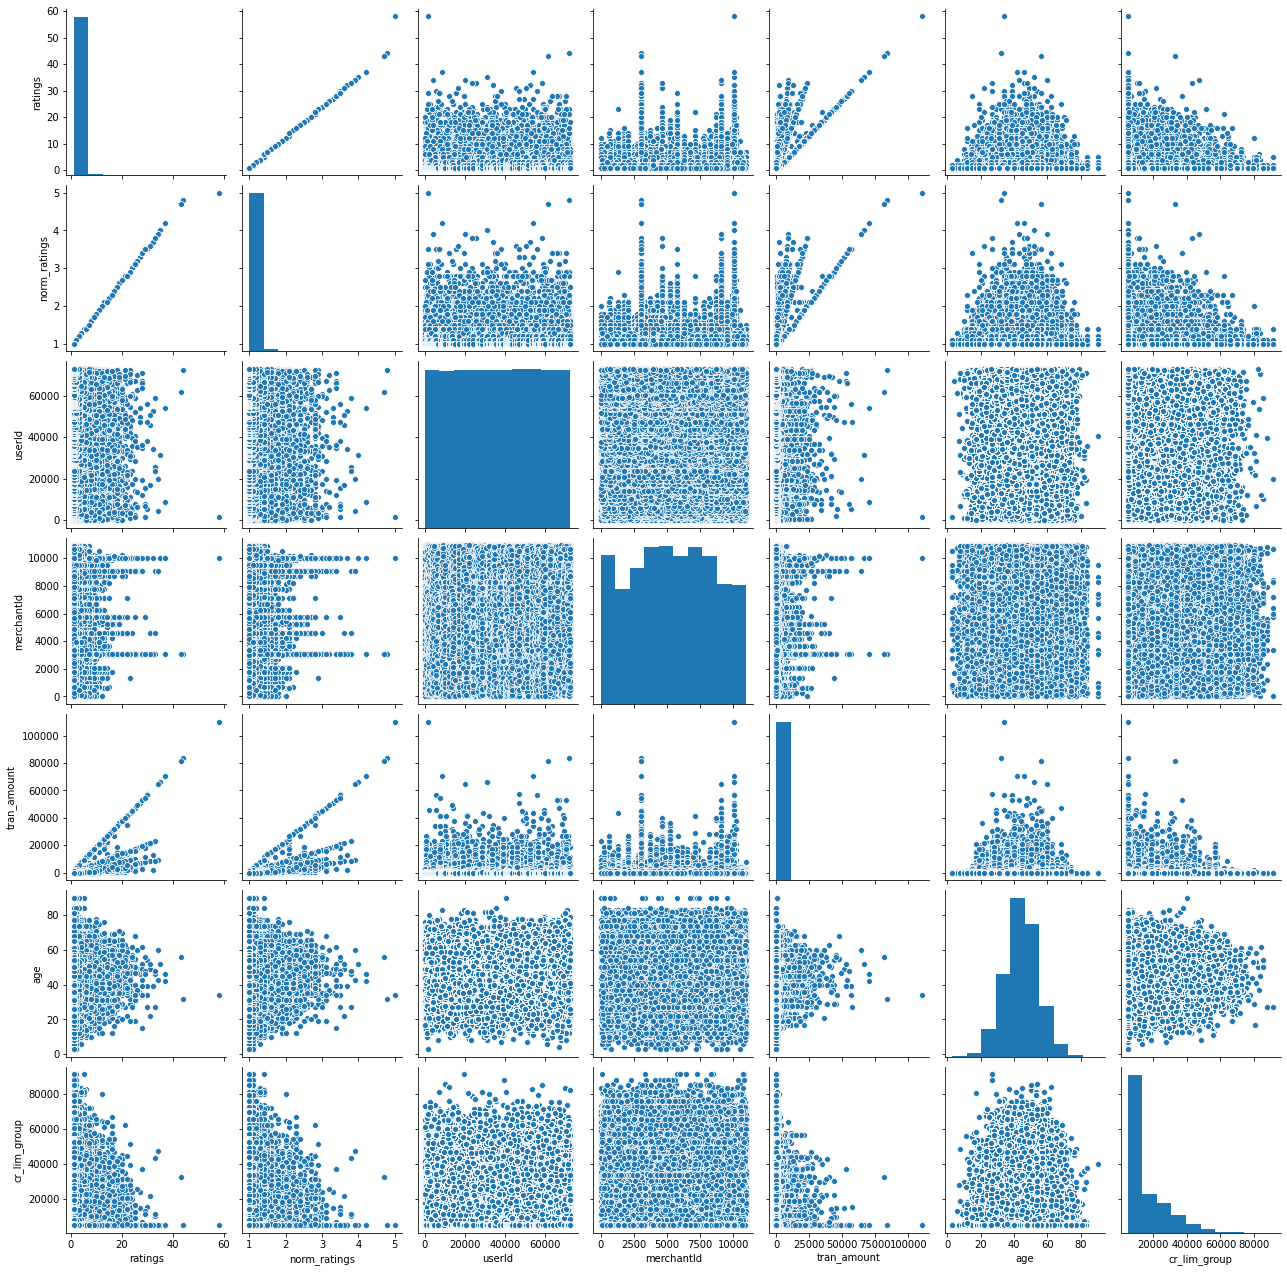

In [ ]:
sns.pairplot(data)
plt.show()

***Features that are strongly correlated with Ratings***

In [ ]:
df_num_corr = data.corr()['ratings'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Ratings:\n{}".format(len(golden_features_list), golden_features_list))

There is 3 strongly correlated values with Ratings:
ratings         1.000000
norm_ratings    0.996728
tran_amount     0.524493
Name: ratings, dtype: float64


***Creating a Dataframe for Merchants***

In [ ]:
Merchants = data[["merchant_name_new","behav_category","merchantId","merchant_country","merchant_city","tran_amount"]]

In [ ]:
Merchants

,merchant_name_new,behav_category,merchantId,merchant_country,merchant_city,tran_amount
0,thewaitingroomcafe,dining,10003,india,mumbai,4.17
1,falak,dining,3069,india,pune,5.42
2,plandinnerrestaurant,dining,7015,united arab emirates,dubai,4.17
3,wildfirezamericangrill,dining,10667,united arab emirates,abu dhabi,2.08
4,levelone,dining,5286,united arab emirates,abu dhabi,7.50
...,...,...,...,...,...,...
991281,hariplaza,miscellaneous stores,3960,india,ghaziabad,30.00
991282,dayanawheelalignment,miscellaneous stores,2420,india,ahmedabad,13.81
991283,carmasters,miscellaneous stores,1786,india,noida,10.95
991284,artzolo,miscellaneous stores,685,india,mumbai,19.05


***Finding the highly transacted Merchants***

In [98]:
print(len(Merchants.merchant_name_new))

991286


In [99]:
print(len(Merchants.behav_category))

991286


In [ ]:
#Finding the unique Merchants
unique_merchant = Merchants.merchant_name_new.nunique()
unique_merchant

10948

In [ ]:
#Finding the Unique categories
unique_merchant_cate = Merchants.behav_category.nunique()
unique_merchant_cate

7

In [ ]:
df_highly_trans_merchant = Merchants.groupby(["tran_amount"])
df_highly_trans_merchant.head()

,merchant_name_new,behav_category,merchantId,merchant_country,merchant_city,tran_amount
0,thewaitingroomcafe,dining,10003,india,mumbai,4.17
1,falak,dining,3069,india,pune,5.42
2,plandinnerrestaurant,dining,7015,united arab emirates,dubai,4.17
3,wildfirezamericangrill,dining,10667,united arab emirates,abu dhabi,2.08
4,levelone,dining,5286,united arab emirates,abu dhabi,7.50
...,...,...,...,...,...,...
990468,speedcommunication,miscellaneous stores,8681,india,bengaluru,327.14
990469,cityfurnish,miscellaneous stores,2077,india,bengaluru,430.96
990470,thedigitalhub,miscellaneous stores,9508,india,new delhi,590.48
990475,medplus,miscellaneous stores,5781,india,pune,613.34


***Finding the top 3 highly transacted merchants and its category***

In [73]:
Merchants.nlargest(3, ['tran_amount']) 

,merchant_name_new,behav_category,merchantId,merchant_country,merchant_city,tran_amount
283267,thomascook,travel,10032,india,new delhi,110299.0
305012,fabhotels,travel,3046,india,chandigarh,83927.0
854598,fairmonthotelsresorts,travel,3058,india,jaipur,81815.0


In [101]:
#Top 25 data with highest tran_amount
data.nlargest(25,["tran_amount"],keep="last")

,customer_id,merchant_name_new,behav_category,ratings,norm_ratings,userId,merchantId,merchant_country,merchant_city,top90_flag,tran_amount,Card_type,card_id,mar_status,age,gender,customer_country,cr_lim_group,customer_city
283267,05a714e0-52aa-4cff-9876-313f9eb05b22,thomascook,travel,58,5.0,1578,10032,india,new delhi,yes,110299.0,GOLD,b802db3c-2b5c-464b-a568-b567bfdaa532,S,34,M,India,5000,Mumbai
305012,fe8106b1-f272-493e-a298-0ecf37d44666,fabhotels,travel,44,4.8,72495,3046,india,chandigarh,yes,83927.0,PLATINUM,b528b905-fd15-44c9-ae77-4d996c965b8c,M,32,M,India,5000,Delhi
854598,d98c7977-c1b8-4058-a68c-57ec43d59f9a,fairmonthotelsresorts,travel,43,4.7,61967,3058,india,jaipur,yes,81815.0,WORLD,7fa5b003-d7af-46fd-bd81-551265f736be,M,56,M,India,32728,Gurgaon
693261,1f5263c2-0c1c-4bf3-91c9-89dc3447f0c4,thomascook,travel,37,4.2,8743,10032,india,new delhi,yes,70561.0,SILVER,10f70ba6-0f5c-4f61-8a70-6046ff78ac0a,M,46,F,India,5000,Noida
488414,bd7882e0-ca5f-4f7d-9e41-6c72f70c53e8,fairmonthotelsresorts,travel,37,4.2,53985,3058,india,jaipur,yes,70498.0,SILVER,5a96de49-558e-4ef0-b668-ca166420019c,S,42,F,India,5000,Jalandhar
205913,6e5f17ee-2062-4685-9b52-866fd376837d,thomascook,travel,35,4.0,31273,10032,india,new delhi,yes,66099.0,PLATINUM,4b6cd542-7f15-49b6-9aa1-4bc4f595cf60,S,52,F,India,5000,New Delhi
512945,46a2b4bc-d0b2-4246-b18a-e16ee24f6f01,swissotelhotelsresorts,travel,34,3.9,19978,9086,india,kolkata,yes,64389.0,SILVER,468f7e79-8559-4fd4-b0a8-eed99f555105,M,60,M,India,5000,Gurgaon
395737,a5bad30a-e724-4b1c-8d5c-4931b59bcaff,thomascook,travel,30,3.5,47246,10032,india,new delhi,yes,57264.0,SILVER,3058dbf7-217e-4af2-9d13-68a39de8aa49,M,27,M,United Arab Emirates,15340,Dubai
122312,1318a429-30ed-4353-b038-48b6f889e580,fairmonthotelsresorts,travel,30,3.5,5316,3058,india,jaipur,yes,56780.0,PLATINUM,15a6d909-06dd-4989-a8e5-e0d9df62251d,D,34,F,India,5000,Noida
586629,c58fe05a-ada4-471f-ba5e-9339a470a63e,thomascook,travel,30,3.5,56245,10032,india,new delhi,yes,56572.0,PLATINUM,51773bd1-3ad9-4f1b-b32d-a7f6c57fd56b,M,39,M,India,5000,New Delhi


***Card Type Analysis***

In [102]:
#Finding the card which highly used for transaction
data.Card_type.value_counts()

PLATINUM    593675
SILVER      248779
GOLD         99793
WORLD        49039
Name: Card_type, dtype: int64

***Analysis the list of countries in the dataset with its count***

In [103]:
data.customer_country.value_counts()

India                   790309
United Arab Emirates    145761
Singapore                54126
None                       976
Thailand                    55
Malaysia                    42
Oman                        17
Name: customer_country, dtype: int64

***Creating a dataframe India in which the customer belong to Indian Country***

In [105]:
India = data[data["customer_country"] == "India"]
India

,customer_id,merchant_name_new,behav_category,ratings,norm_ratings,userId,merchantId,merchant_country,merchant_city,top90_flag,tran_amount,Card_type,card_id,mar_status,age,gender,customer_country,cr_lim_group,customer_city
0,0064384c-53f4-439f-afa8-527fb6069433,thewaitingroomcafe,dining,1,1.0,105,10003,india,mumbai,yes,4.17,SILVER,44f76029-2a05-4b30-8ef6-081460c00957,M,38,M,India,5000,Chennai
1,0064384c-53f4-439f-afa8-527fb6069433,falak,dining,1,1.0,105,3069,india,pune,yes,5.42,SILVER,44f76029-2a05-4b30-8ef6-081460c00957,M,38,M,India,5000,Chennai
2,0064384c-53f4-439f-afa8-527fb6069433,plandinnerrestaurant,dining,1,1.0,105,7015,united arab emirates,dubai,yes,4.17,SILVER,44f76029-2a05-4b30-8ef6-081460c00957,M,38,M,India,5000,Chennai
3,0064384c-53f4-439f-afa8-527fb6069433,wildfirezamericangrill,dining,1,1.0,105,10667,united arab emirates,abu dhabi,no,2.08,SILVER,44f76029-2a05-4b30-8ef6-081460c00957,M,38,M,India,5000,Chennai
4,0064384c-53f4-439f-afa8-527fb6069433,levelone,dining,1,1.0,105,5286,united arab emirates,abu dhabi,no,7.50,SILVER,44f76029-2a05-4b30-8ef6-081460c00957,M,38,M,India,5000,Chennai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991281,ff85e4a6-2d1e-4d5c-bda1-5dbda9045bc8,hariplaza,miscellaneous stores,2,1.1,72780,3960,india,ghaziabad,yes,30.00,GOLD,f3b567da-ac5b-41ab-82db-b192d75172cb,D,26,F,India,5000,Gurgaon
991282,ff85e4a6-2d1e-4d5c-bda1-5dbda9045bc8,dayanawheelalignment,miscellaneous stores,1,1.0,72780,2420,india,ahmedabad,yes,13.81,GOLD,f3b567da-ac5b-41ab-82db-b192d75172cb,D,26,F,India,5000,Gurgaon
991283,ff85e4a6-2d1e-4d5c-bda1-5dbda9045bc8,carmasters,miscellaneous stores,1,1.0,72780,1786,india,noida,yes,10.95,GOLD,f3b567da-ac5b-41ab-82db-b192d75172cb,D,26,F,India,5000,Gurgaon
991284,ff85e4a6-2d1e-4d5c-bda1-5dbda9045bc8,artzolo,miscellaneous stores,1,1.0,72780,685,india,mumbai,yes,19.05,GOLD,f3b567da-ac5b-41ab-82db-b192d75172cb,D,26,F,India,5000,Gurgaon


***Analysis the Behav category w.r.t India***

In [106]:
India.behav_category.describe()

count                   790309
unique                       7
top       miscellaneous stores
freq                    177595
Name: behav_category, dtype: object

***Least valued data w.r.to tran_amount***

In [109]:
India.nsmallest(5,["tran_amount"])

,customer_id,merchant_name_new,behav_category,ratings,norm_ratings,userId,merchantId,merchant_country,merchant_city,top90_flag,tran_amount,Card_type,card_id,mar_status,age,gender,customer_country,cr_lim_group,customer_city
2264,4d72e2e8-eba9-4f42-aed6-487db17b45b2,funkymonkeys,entertainment,1,1.0,21911,3454,united arab emirates,dubai,yes,0.0,SILVER,4b4413ff-f135-4c40-aaa9-0888107d4380,M,40,M,India,5000,Bengaluru
2425,53498f2b-fb89-4cbf-a05b-c59331651cc7,madagascarkids,entertainment,1,1.0,23620,5485,india,bengaluru,yes,0.0,PLATINUM,e83d2ac4-d87e-48a4-b0a8-7b58ee764ecf,S,50,M,India,41773,Delhi
2427,53498f2b-fb89-4cbf-a05b-c59331651cc7,chalopicnic,entertainment,1,1.0,23620,1872,india,mumbai,yes,0.0,PLATINUM,e83d2ac4-d87e-48a4-b0a8-7b58ee764ecf,S,50,M,India,41773,Delhi
4368,8e7e00ff-00d1-4c60-81e1-e671b174ee64,phobiadubaiescapegames,entertainment,1,1.0,40540,6923,united arab emirates,dubai,yes,0.0,PLATINUM,3db05376-4d67-4687-ac3a-ca300d7e0615,S,43,F,India,12486,Ghaziabad
4570,93a6c681-0c4d-499a-a57d-6e053bf3247e,kanchankesarivillageresort,entertainment,1,1.0,41961,4757,india,jaipur,yes,0.0,GOLD,f03abd99-b0b8-4f33-878b-b3dc00355234,D,52,F,India,9805,Chandigarh


***Highly transacted Category***

In [110]:
India.behav_category.mode()

0    miscellaneous stores
dtype: object

***Univariate Analysis of Category***

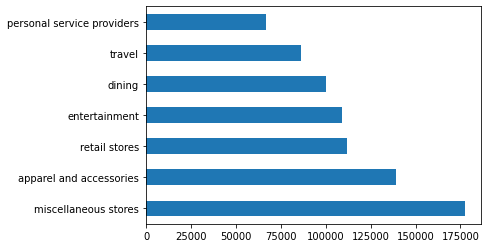

In [115]:
India.behav_category.value_counts().sort_values(ascending=False).head(10).plot.barh()

***Univariate Analysis of Merchant City***

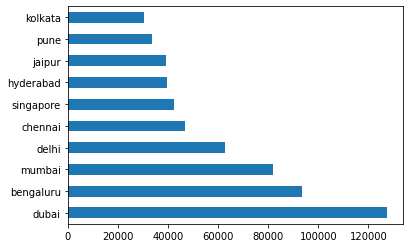

In [116]:
India.merchant_city.value_counts().sort_values(ascending=False).head(10).plot.barh()

***Univariate Analysis of Customer city***

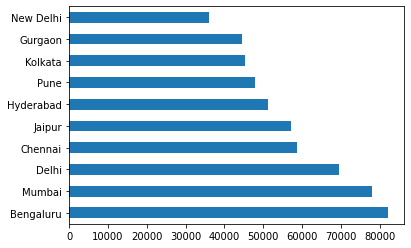

In [119]:
India.customer_city.value_counts().sort_values(ascending = False).head(10).plot.barh()